In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
%matplotlib inline

In [2]:
def image_show(image,nrows=1,ncols=1,cmap="gray",**kwargs):
    f,axes = plt.subplots(nrows,ncols,figsize=(15,15),sharey = True)
    axes.imshow(image,cmap = "gray",**kwargs)
    axes.axis("off")
    return f,axes

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe316830d10>)

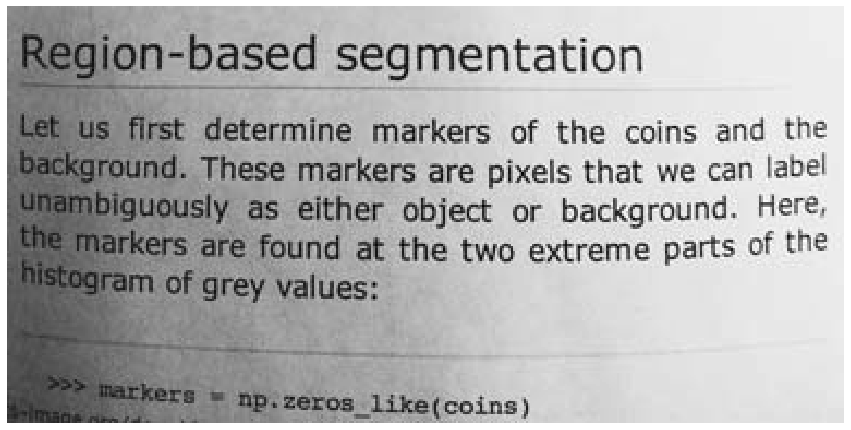

In [3]:
text = data.page()
image_show(text)

(0, 256)

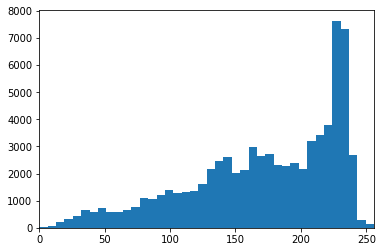

In [4]:
fig,axes=plt.subplots(1,1)
axes.hist(text.ravel(),bins = 40,range = [0,256])
axes.set_xlim(0,256)

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe316713390>)

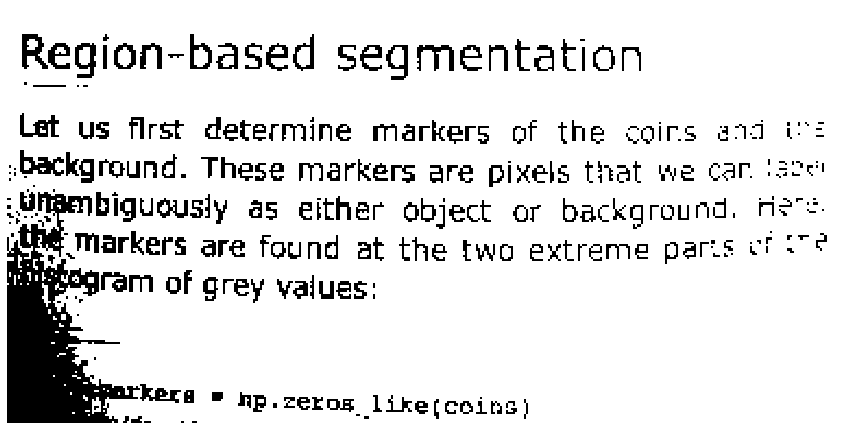

In [5]:
text_segmented = text>95
image_show(text_segmented)

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3165e7110>)

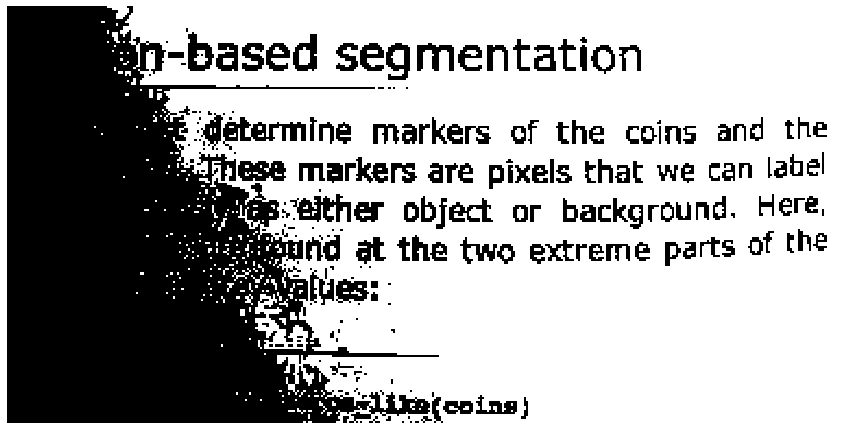

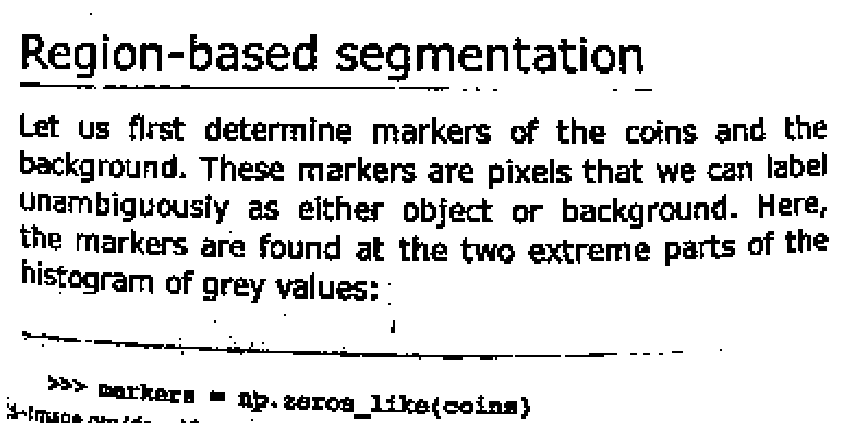

In [6]:
#There are certain functions which return threshold value rather than simply applying to image
text_threshold1 = filters.threshold_local(text,51,offset = 10)
text_threshold2 = filters.threshold_otsu(text)
image_show(text > text_threshold2)
image_show(text > text_threshold1)

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3165b0dd0>)

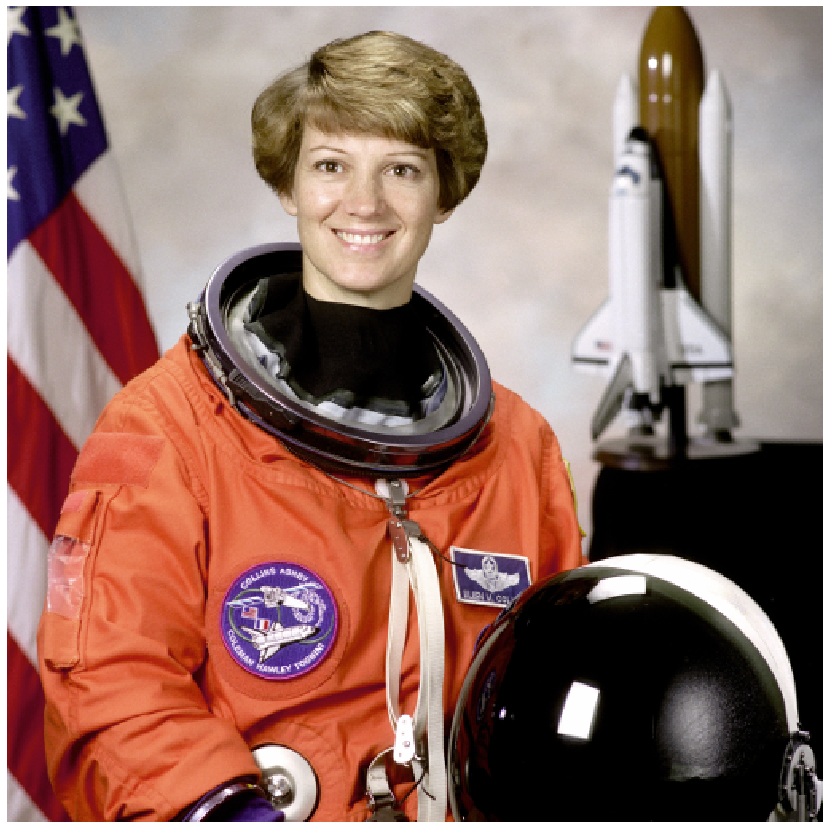

In [7]:
#Supervised segmentation
astronaut = data.astronaut()
image_show(astronaut)

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3165785d0>)

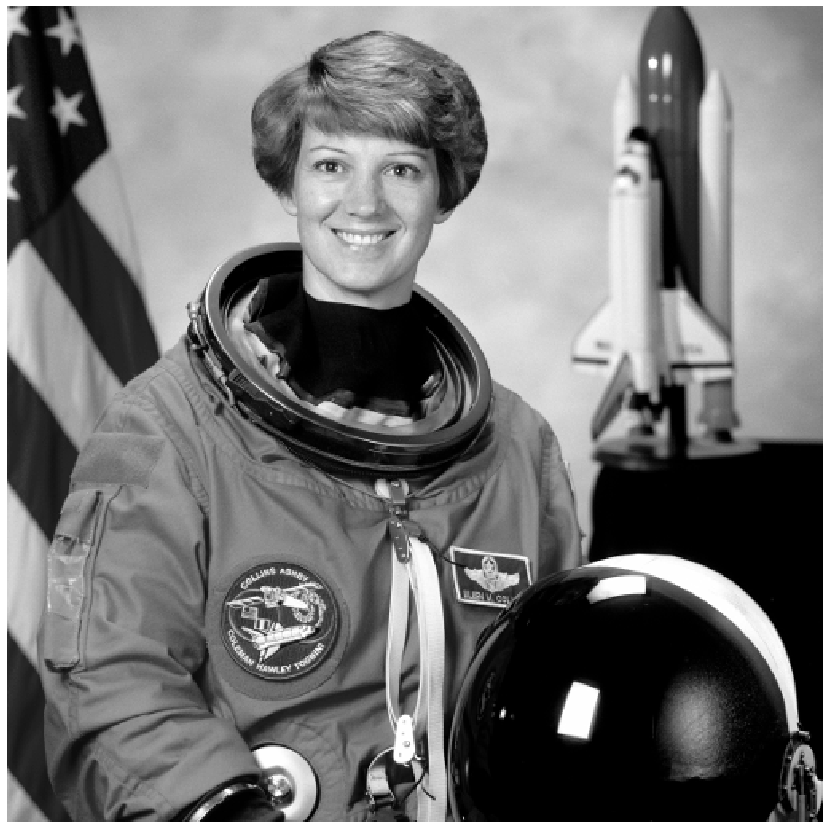

In [8]:
#Before segmentation it is always a better idea to remove noise
#As the contrast is good in this image for head against background
#So we will basically convert the image to gray scale image
astronaut_gray = color.rgb2gray(astronaut)
image_show(astronaut_gray)

In [9]:
#Here now we will  use two different method which segament with a very different approach
#1)Active contour segmentation
#2)Random Walker

In [22]:
#Active contou segmentation
#In this we will draw a circle sort of around the region of interest(to be segmented) and then it will move slowly
#towards the edges
def circle_points(resolution,center,radius):
    radians = np.linspace(0,2*np.pi,resolution)
    c = center[1]+radius*np.cos(radians)
    r = center[0]+radius*np.sin(radians)
    return np.array([c,r]).T
points = circle_points(200,[100,220],100)[:-1]

In [25]:
snake = seg.active_contour(astronaut_gray,points,alpha = 0.1)

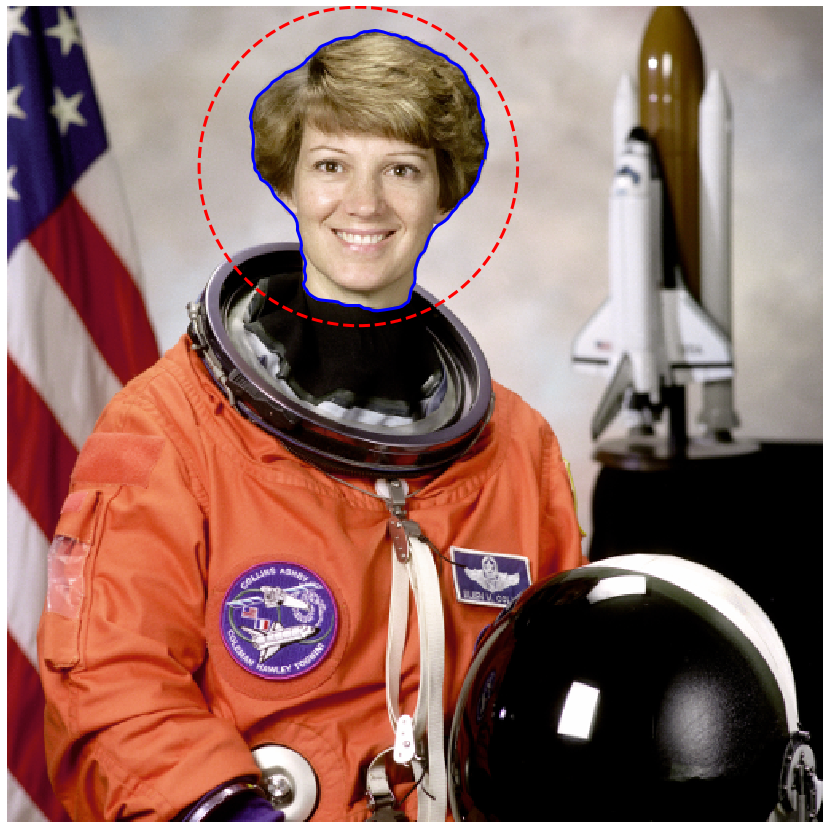

In [26]:
f,axes = image_show(astronaut)
axes.plot(points[:,0],points[:,1],"--r",lw = 3)
axes.plot(snake[:,0],snake[:,1],"-b",lw = 3)

In [27]:
#Random Walker
#Gere we sprinkle a bunch of pixels in image(then these pixel found cheapest path to the labels given)

In [28]:
astronaut_labels = np.zeros(astronaut_gray.shape,np.uint8)

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3141421d0>)

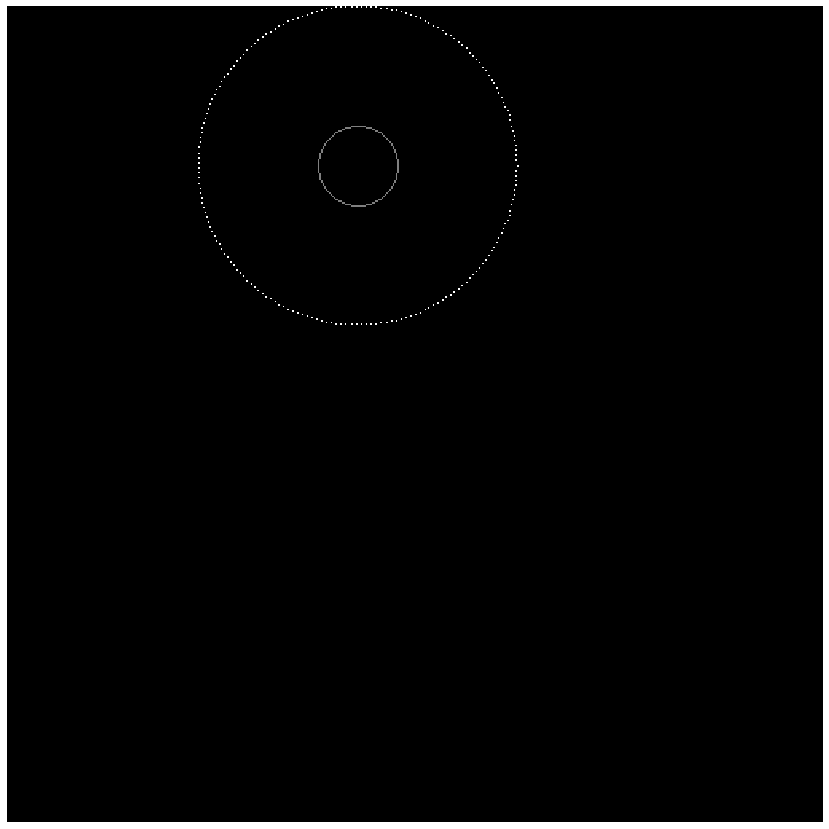

In [31]:
indices = draw.circle_perimeter(100,220,25)
astronaut_labels[indices] = 1
astronaut_labels[points[:,1].astype(np.int),points[:,0].astype(np.int)] = 2
image_show(astronaut_labels)

In [42]:
astronaut_segmented = seg.random_walker(astronaut_gray,astronaut_labels,beta = 2500)

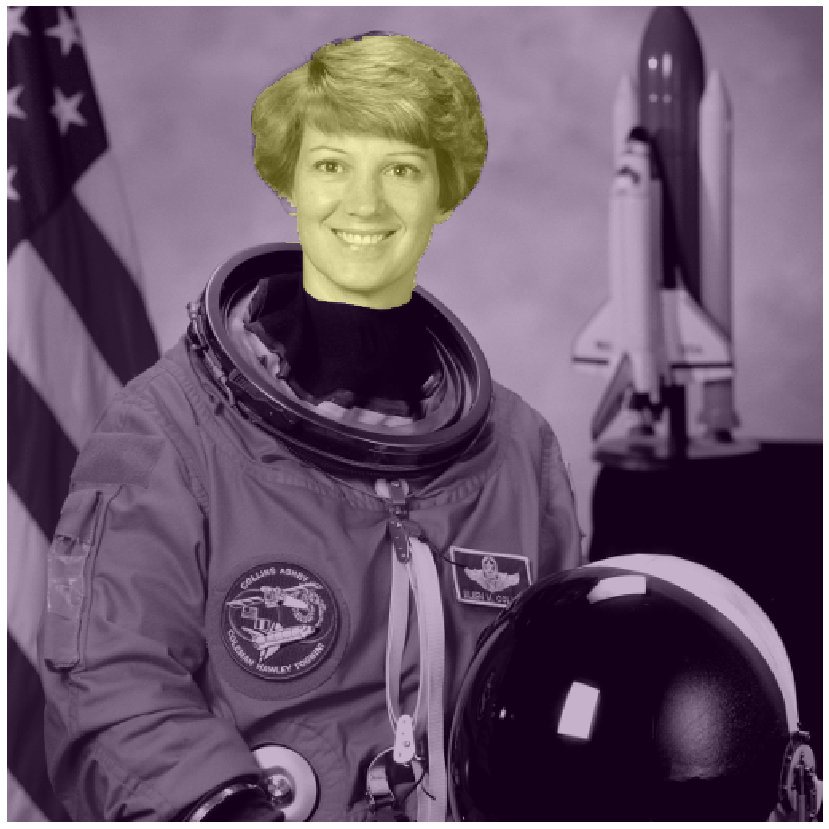

In [43]:
f,axes = image_show(astronaut_gray)
axes.imshow(astronaut_segmented==1,alpha = 0.3)

In [44]:
#Unsupervised segamentation

In [45]:
#SLIC
astronaut_slic = seg.slic(astronaut)

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe30edb4990>)

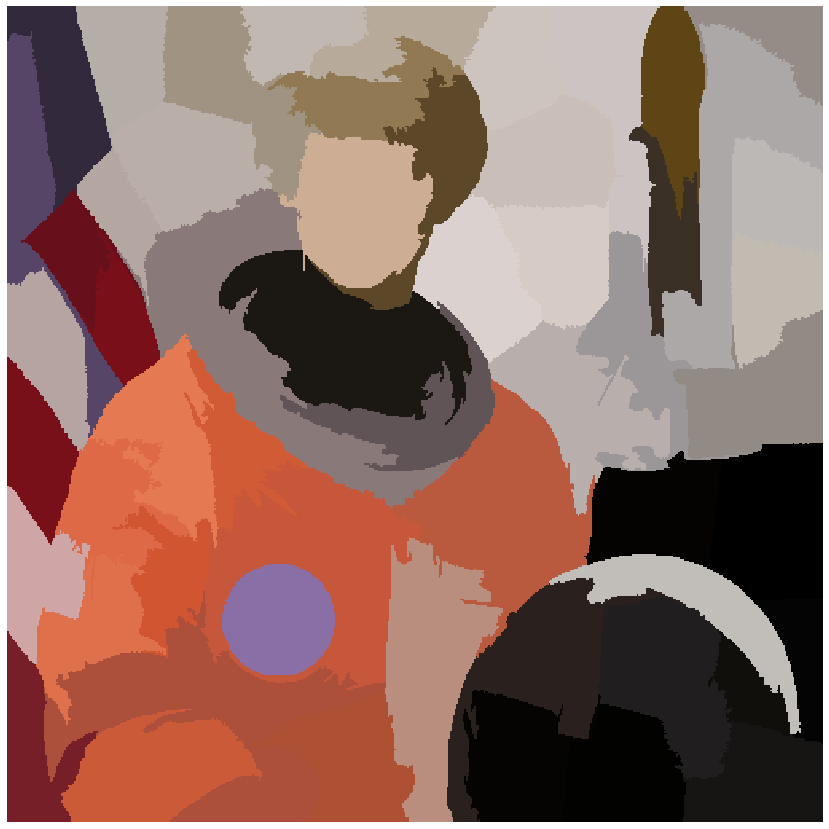

In [47]:
image_show(color.label2rgb(astronaut_slic,astronaut,kind = "avg"))
#Here we are basically decomposing the data down

In [50]:
#Chan vese
#The algorithm iterates the level set,which allow it to capture complex and even disconnected features
#Result is binary there will be only one region

In [51]:
chan_vese = seg.chan_vese(astronaut_gray)

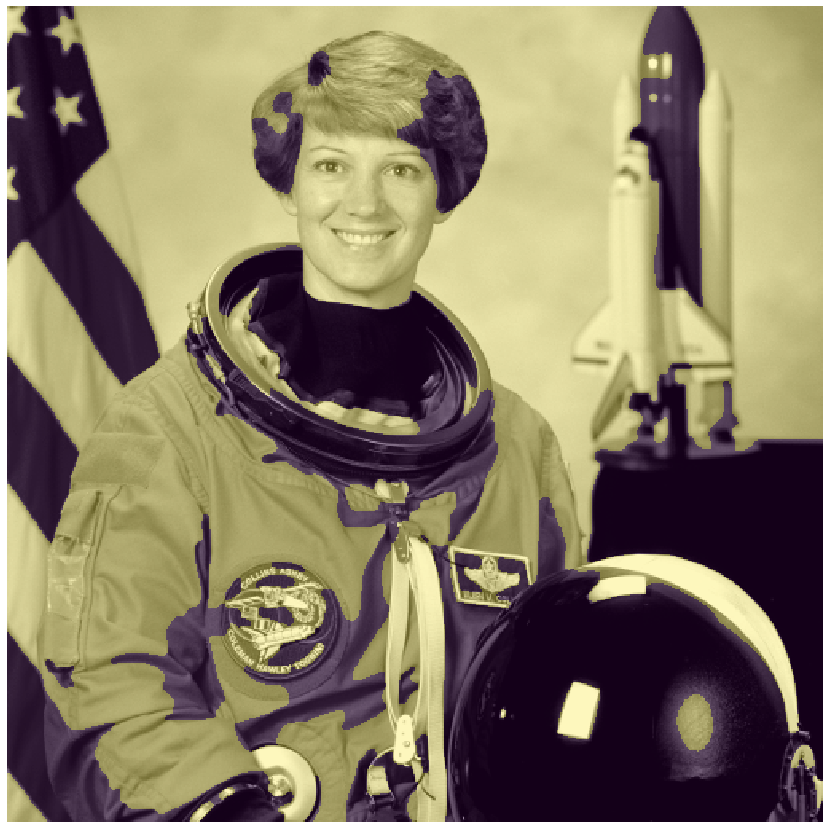

In [52]:
f,axes = image_show(astronaut_gray)
axes.imshow(chan_vese == 0,alpha = 0.3)

In [53]:
#Felzenszwalb
#Uses a minimum spanning tree clustering
#Require a color image

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe30ec77c10>)

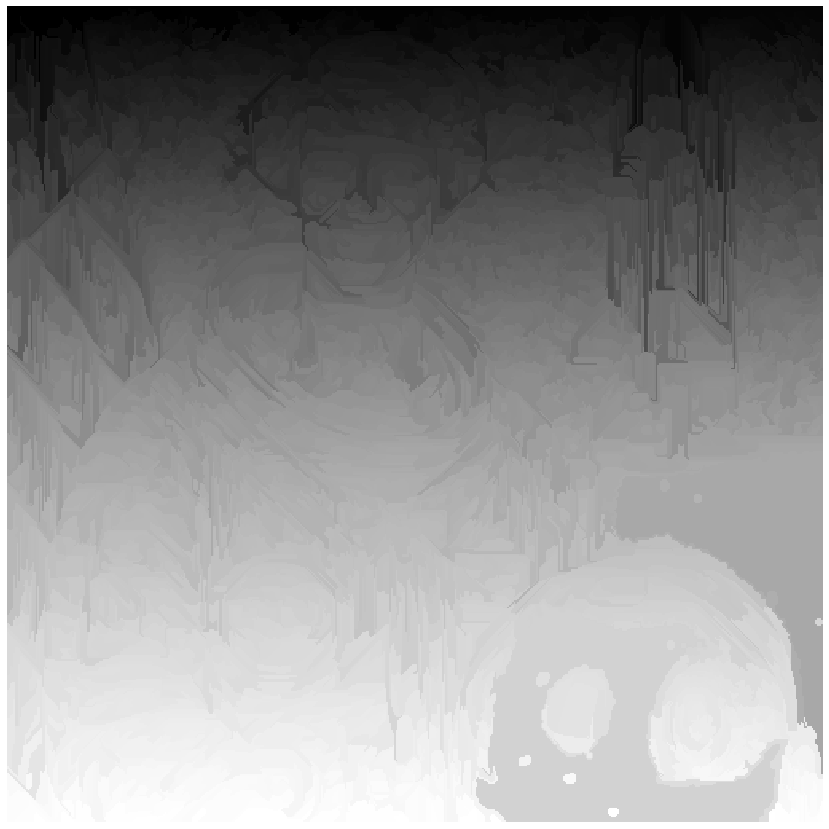

In [54]:
astronaut_felzenszwalb = seg.felzenszwalb(astronaut)
image_show(astronaut_felzenszwalb)

In [55]:
#No of unique labels
np.unique(astronaut_felzenszwalb).size

3295

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe30ebcfe90>)

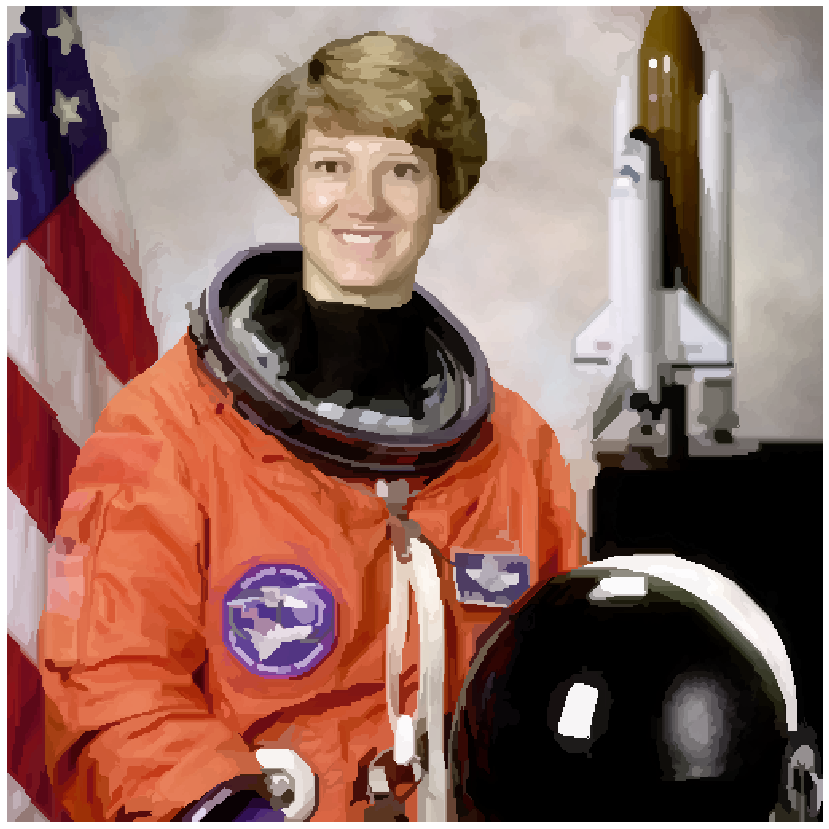

In [56]:
#REcolouring regions using region averaging
astronaut_felzenszwalb_colored = color.label2rgb(astronaut_felzenszwalb,astronaut,kind = "avg")
image_show(astronaut_felzenszwalb_colored)
#This approach is sometime also called as oversegmentation